In [1]:
from segment_anything import SamAutomaticMaskGenerator, SamPredictor, sam_model_registry

In [2]:
sam = sam_model_registry["default"](checkpoint="sam_vit_h_4b8939.pth")
sam.to(device="cuda")
mask_generator = SamAutomaticMaskGenerator(sam)

In [3]:
import cv2
image = cv2.imread('../angio-data/topic_3077/1_2_840_4267_32_101764125239640783140916903597546250126-1_2_840_4267_32_101352421792845037243670867947065754273-1_2_840_4267_32_52434459582013403824917849814589154137_dcm_Header00.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [4]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

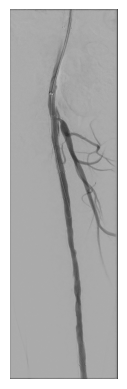

In [5]:
image = image[:, 475:-450]
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(image)
plt.axis('off')
#plt.savefig("angio-1.png")
plt.show()

In [8]:
masks = mask_generator.generate(image)
import numpy as np
import torch

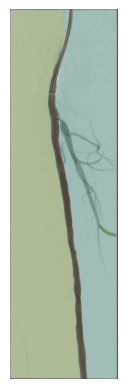

In [9]:
plt.figure()
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.savefig("angio-1-seg.png")
plt.show()

In [10]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)

def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)   
    
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))    


In [11]:
point_predictor = SamPredictor(sam)
point_predictor.set_image(image)

In [12]:
input_point = np.array([[400, 375]])
input_label = np.array([1])

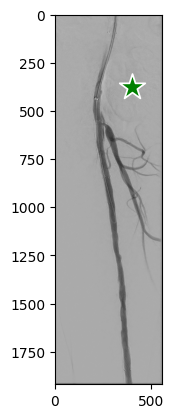

In [13]:
plt.figure()
plt.imshow(image)
show_points(input_point, input_label, plt.gca())
plt.axis('on')
plt.show()  

In [14]:
masks, scores, logits = point_predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    multimask_output=True,
)

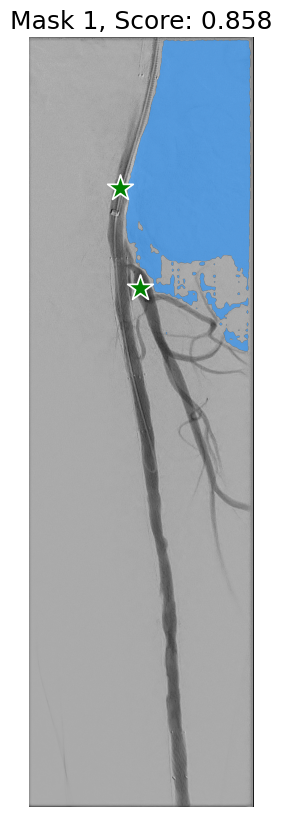

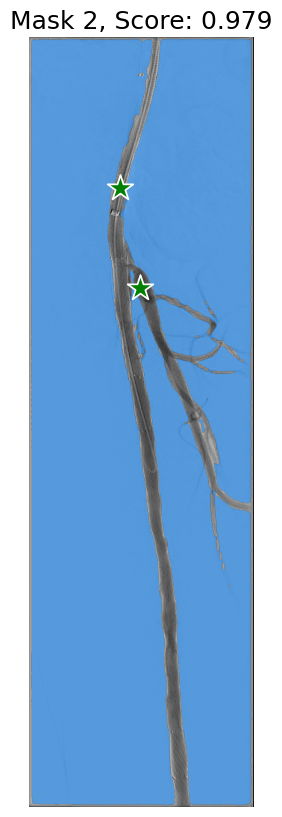

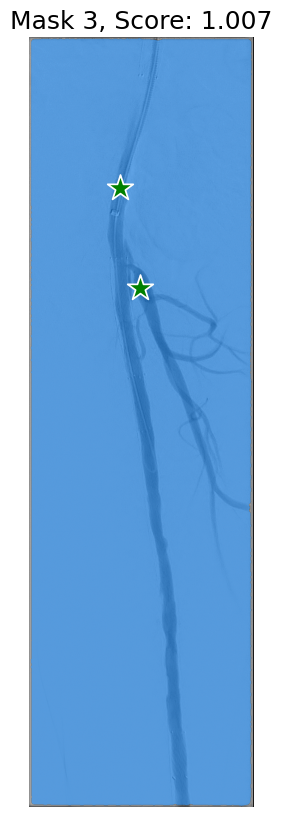

In [17]:
for i, (mask, score) in enumerate(zip(masks, scores)):
    plt.figure(figsize=(10,10))
    plt.imshow(image)
    show_mask(mask, plt.gca())
    show_points(input_point, input_label, plt.gca())
    plt.title(f"Mask {i+1}, Score: {score:.3f}", fontsize=18)
    plt.axis('off')
    plt.show()  


In [16]:
input_point = np.array([[225, 375], [275, 625]])
input_label = np.array([1, 1])

mask_input = logits[np.argmax(scores), :, :]

In [62]:
masks, _, _ = point_predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    mask_input=mask_input[None, :, :],
    multimask_output=False,
)

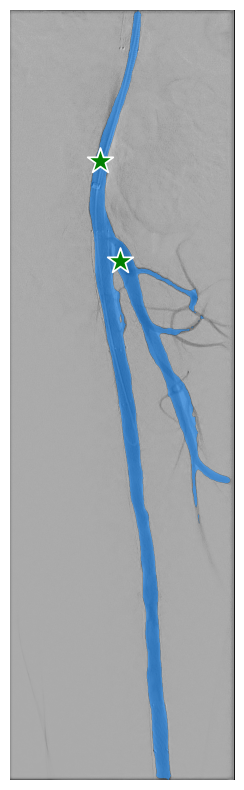

In [64]:
plt.figure(figsize=(10,10))
plt.imshow(image)
show_mask(masks, plt.gca())
show_points(input_point, input_label, plt.gca())
plt.axis('off')
plt.show() 


In [87]:
input_box = np.array([75, 75, 475, 1775])


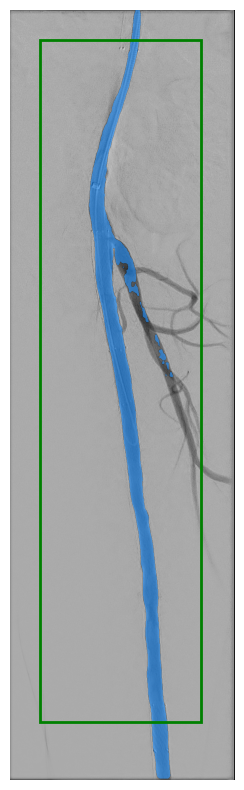

In [88]:
masks, _, _ = point_predictor.predict(
    point_coords=None,
    point_labels=None,
    box=input_box[None, :],
    multimask_output=False,
)
plt.figure(figsize=(10, 10))
plt.imshow(image)
show_mask(masks[0], plt.gca())
show_box(input_box, plt.gca())
plt.axis('off')
plt.show()


In [82]:
image_paths = ['../angio-data/topic_3077/1_2_840_4267_32_101764125239640783140916903597546250126-1_2_840_4267_32_101352421792845037243670867947065754273-1_2_840_4267_32_52434459582013403824917849814589154137_dcm_Header00.png', '../angio-data/topic_3077/1_2_840_4267_32_118780637930196748307344890851013865155-1_2_840_4267_32_256645106984325084204492175192995280336-1_2_840_4267_32_9989355611731959481679333075094681575_dcm_Header00.png', '../angio-data/topic_3077/1_2_840_4267_32_118780637930196748307344890851013865155-1_2_840_4267_32_256645106984325084204492175192995280336-1_2_840_4267_32_9989355611731959481679333075094681575_dcm_Header00.png', '../angio-data/topic_3077/1_2_840_4267_32_120016615723683223982298280538663629761-1_2_840_4267_32_261279284312775509796855402493984106086-1_2_840_4267_32_121998357377056375288028204394928816769_dcm_Header00.png', '../angio-data/topic_3077/1_2_840_4267_32_12032442553890945406087342268535480713-1_2_840_4267_32_123637817562834348864648844901757678542-1_2_840_4267_32_135235907052744666582448150912023651638_dcm_Header00.png', '../angio-data/topic_3077/1_2_840_4267_32_12032442553890945406087342268535480713-1_2_840_4267_32_172451564316660651059354176933754607934-1_2_840_4267_32_157969219801979286196668302624288396899_dcm_Header00.png', '../angio-data/topic_3077/1_2_840_4267_32_12054920628321566989887240438056957851-1_2_840_4267_32_142472523866517097757221982471389962679-1_2_840_4267_32_29407172191482585092355052298084050896_dcm_Header00.png',  '../angio-data/topic_3077/1_2_840_4267_32_12054920628321566989887240438056957851-1_2_840_4267_32_209462637360419106382882806858847860429-1_2_840_4267_32_63849394726097993162266231485411155023_dcm_Header00.png', '../angio-data/topic_3077/1_2_840_4267_32_121471453854189118683421118602105431311-1_2_840_4267_32_240115250096963505533660898127634488210-1_2_840_4267_32_20226041510052824867118656235385536206_dcm_Header00.png']
image = cv2.imread(image_paths[8])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
point_predictor.set_image(image)

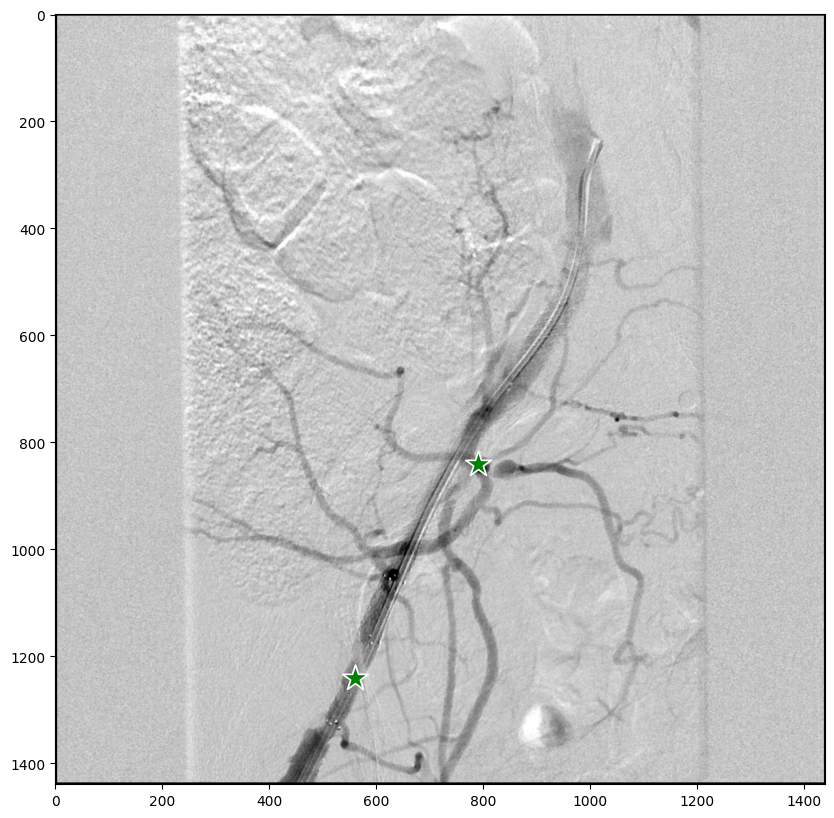

In [94]:
input_point = np.array([[560, 1240], [790, 840]])
input_label = np.array([1, 1])

mask_input = logits[np.argmax(scores), :, :]
plt.figure(figsize=(10,10))
plt.imshow(image)
show_points(input_point, input_label, plt.gca())
plt.axis('on')
plt.show()  

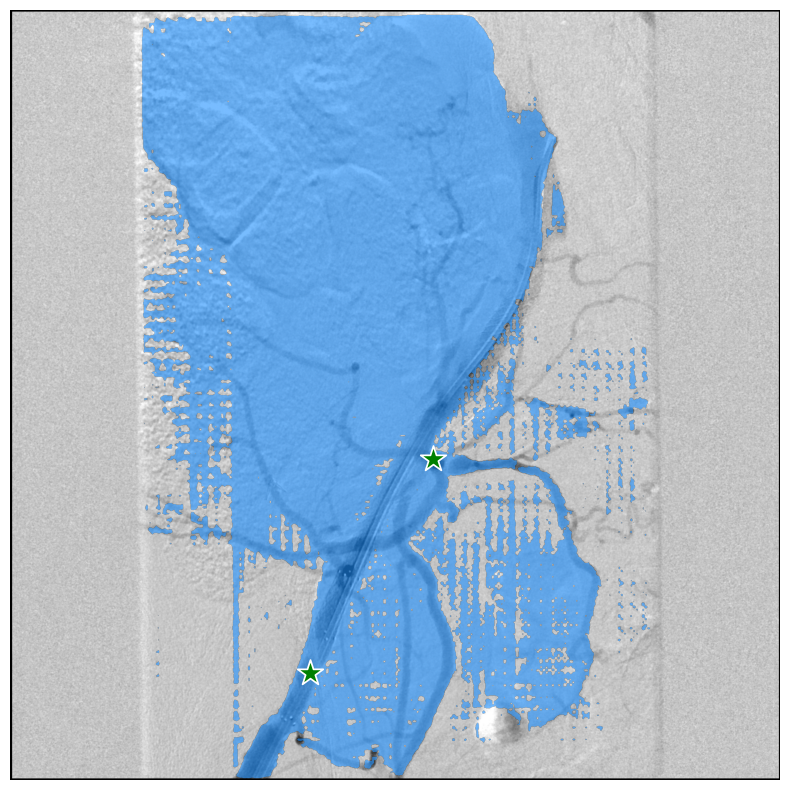

In [95]:
masks, _, _ = point_predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    mask_input=mask_input[None, :, :],
    multimask_output=False,
)
plt.figure(figsize=(10,10))
plt.imshow(image)
show_mask(masks, plt.gca())
show_points(input_point, input_label, plt.gca())
plt.axis('off')

plt.show() 
